Write Python code that can create a CSV containing 10 columns of text data​

Each entry in each row should be between 3 and 25 characters​
Adjacent rows in a CSV should not be the same​
Generate files of size {0.1, 1, 5, 10, 100, 500} MB of data​
Execution time for creating all of the CSV files should take less than 5 minutes. (Email me if you do not solve this in less than an hour.)​ ​

The precision of the file sizes is +/- 20%.

Measure how much time it takes to write each CSV file to disk. In your measurement do not include the time used in creating the CSV files. Perform this measurement three times per file size. Each measurement is of a different CSV. That's three different files per file size.​

Measure how much time it takes for your computer to load the data from the CSV on disk into a Pandas dataframe. Perform this measurement three times per file size. Each measurement is of a different CSV.​

Results: ​

table of values (file size versus read time and write time for each experiment) ​
Plot the average write times and average load times versus file size in a single scatter plot​ with semilogx scale
Submit your python notebook (.ipynb file) containing the code for the experiment (creating files, running the timing experiments) and the results. ​

Do not include the CSV files in your submission.



In [1]:
import pandas as pd
import numpy as np
import random
import string
import time
from faker import Faker
from faker.providers import internet
import os
import matplotlib.pyplot as plt

In [2]:
stt= time.time()

Creating an empty Data Frame and Faker object

In [3]:
data = pd.DataFrame()
fake=Faker()

Creating the files to write the data, File name represents the size of the file

In [4]:
def createFile():
    data.to_csv(".1_1.csv",index=True)
    data.to_csv("1_1.csv",index=True)
    data.to_csv("5_1.csv",index=True)
    data.to_csv("10_1.csv",index=True)
    data.to_csv("100_1.csv",index=True)
    data.to_csv("500_1.csv",index=True)

In [5]:
createFile()

This Function will generate the dataframe in write it to a file. A fake list is created with different fake parameters and then
sampled to append in a dataframe.

In [6]:
def createFakeDF(sets,filename):
    df=pd.DataFrame()
    listt=[fake.name(),fake.address(),fake.email(),fake.text(),fake.country(),fake.url(),fake.century(),fake.credit_card_number(),fake.date(),fake.first_name()]
    for _ in range(sets):
        x=[]
        for i in range(10000):
            x.append(random.sample(listt, len(listt))) # Sampling the fake list instead of creating a new one each time to reduce the execution time
        df=df.append(x)
    with open(filename, 'a') as f:# Writing to a file
        df.to_csv(f, header=False)

Creating and writing to make .1 MB file, returning the time taken to perform this action and the size of the file

In [7]:
def createLessThan1MBfile(fileName):
    start_time = time.time()
    df=pd.DataFrame()
    listt=[fake.name(),fake.address(),fake.email(),fake.text(),fake.country(),fake.url(),fake.century(),fake.credit_card_number(),fake.date(),fake.first_name()]
    x=[]
    for i in range(500):
        x.append(random.sample(listt, len(listt)))
    df=df.append(x)
    with open(fileName, 'a') as f:
        df.to_csv(f, header=False)
    #createFakeDF(1,fileName)
    timee=round(time.time() - start_time,2)
    size=round(os.path.getsize(fileName)/(1024*1024),2)
    return timee,size

Creating and writing to make 1 MB file,  returning the time taken to perform this action and the size of the file

In [8]:
def creat1MBFile(fileName):
    start_time = time.time()
    df=pd.DataFrame()
    listt=[fake.name(),fake.address(),fake.email(),fake.text(),fake.country(),fake.url(),fake.century(),fake.credit_card_number(),fake.date(),fake.first_name()]
    x=[]
    for i in range(5000):
        x.append(random.sample(listt, len(listt)))
    df=df.append(x)
    with open(fileName, 'a') as f:
        df.to_csv(f, header=False)
    timee=round(time.time() - start_time,2)
    size=round(os.path.getsize(fileName)/(1024*1024),2)
    return timee,size

As the file is bigger in size to calling the function to generate and write the data into 5MB file,  returning the time taken to perform this action and the size of the file

In [9]:
def creat5MBFile(fileName):
    start_time = time.time()
    createFakeDF(2,fileName)
    timee=round(time.time() - start_time,2)
    size=round(os.path.getsize(fileName)/(1024*1024),2)
    return timee,size

Function to generate 10MB file,  returning the time taken to perform this action and the size of the file

In [10]:
def creat10MBFile(fileName):
    start_time = time.time()
    createFakeDF(4,fileName)
    timee=round(time.time() - start_time,2)
    size=round(os.path.getsize(fileName)/(1024*1024),2)
    return timee,size

Function to generate 100MB file,  returning the time taken to perform this action and the size of the file

In [11]:
def creat100MBFile(fileName):
    start_time = time.time()
    createFakeDF(37,fileName)
    timee=round(time.time() - start_time,2)
    size=round(os.path.getsize(fileName)/(1024*1024),2)
    return timee,size

Function to generate 500MB file,  returning the time taken to perform this action and the size of the file

In [12]:
def creat500MBFile(fileName):
    start_time = time.time()
    createFakeDF(150,fileName)
    timee=round(time.time() - start_time,2)
    size=round(os.path.getsize(fileName)/(1024*1024),2)
    return timee,size

This cell calls each of the method above to create the respective file of respective size. The measurement is performed 3 times
and the time taken and size of the files are extended to the list name write_time, size

In [13]:
st= time.time()
size=[]
write_time=[]
for _ in range(3):
    createFile()
    write_time_L1, size_L1=createLessThan1MBfile(".1_1.csv")
    write_time_1, size_1=creat1MBFile("1_1.csv")
    write_time_5, size_5=creat5MBFile("5_1.csv")
    write_time_10, size_10=creat10MBFile("10_1.csv")
    write_time_100, size_100=creat100MBFile("100_1.csv")
    write_time_500, size_500=creat500MBFile("500_1.csv")
    size.extend((size_L1, size_1, size_5, size_10, size_100, size_500))
    write_time.extend((write_time_L1, write_time_1, write_time_5,write_time_10,write_time_100,write_time_500))
print('Final Time is:',round(time.time() - st,2))
#print(os.stat('.1.csv').st_size)

Final Time is: 444.96


Function to read the file and return the time taken

In [14]:
def readCSV(fileName):
    start_time = time.time()
    x=pd.read_csv(fileName, error_bad_lines=False)
    return round(time.time() - start_time,2)

Performed the read action 3 times and time were extended to read_time list

In [15]:
read_time=[]
for _ in range(3):
    time_L1=readCSV(".1_1.csv")
    time_1=readCSV("1_1.csv")
    time_5=readCSV("5_1.csv")
    time_10=readCSV("10_1.csv")
    time_100=readCSV("100_1.csv")
    time_500=readCSV("500_1.csv")
    read_time.extend((time_L1,time_1,time_5,time_10,time_100,time_500))

Created a DataFrame with size, write_time, read_time lists

In [16]:
Scaling_Data = pd.DataFrame(list(zip(size, write_time, read_time)), 
               columns =['File_Size', 'Write_Time','Read_Time']) 

In [17]:
Scaling_Data

,File_Size,Write_Time,Read_Time
0,0.16,0.03,0.12
1,1.51,0.30,0.11
2,6.33,1.25,0.22
3,12.66,2.75,0.38
4,120.29,27.86,3.18
5,499.09,118.26,13.00
6,0.16,0.03,0.03
7,1.43,0.36,0.06
8,5.87,1.38,0.23
9,14.42,2.98,0.36


Scatter Plot for the Write time and Read time to the file size

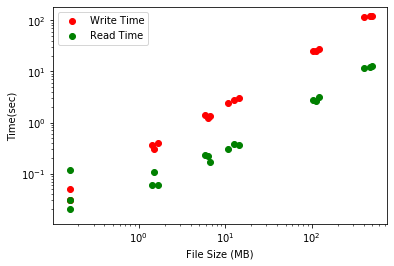

In [18]:
fig = plt.figure()
ax = plt.gca()
plt.scatter(Scaling_Data['File_Size'], Scaling_Data['Write_Time'], color='r', label='Write Time')
plt.scatter(Scaling_Data['File_Size'], Scaling_Data['Read_Time'] , color='g', label='Read Time')
plt.xlabel('File Size (MB)')
plt.ylabel('Time(sec)')
plt.legend()
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [19]:
print(round(time.time() - stt,2))

496.91
